# Carga de librerías

Se utiliza la librería **pandas** para cargar los datos del fichero *2016.csv*.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from datetime import datetime

In [0]:
import pandas as pd

# Carga y visualización de datos

Se cargan los datos a memoria leyendo desde el fichero CSV y se muestra la tabla con todos los datos.

In [0]:
data = pd.read_csv("/content/2016.csv")
(n_samples, n_features) = data.shape
happy_labels_5 = ['Infeliz', 'Feliz']
data['Happiness Score'] = pd.qcut(data['Happiness Score'],
                              q=[0, .5, 1],
                              labels=happy_labels_5)
data


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,Feliz,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,Feliz,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,Feliz,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,Feliz,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,Feliz,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,Infeliz,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,Infeliz,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,Infeliz,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,Infeliz,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


Estos datos representan el valor que aportan ciertos aspectos como la familia o la economía a la felicidad de las personas, así como el propio valor de la felicidad (entre 0 y 10). Para facilitar el estudio hemos cambiado los valores numéricos por valores categóricos: **feliz** o **infeliz**.

# Preprocesados de datos 

Los datos de entrada serán los valores de la economía, la salud, la familia, la libertad y la confianza en el gobierno. Como salida utilizamos el valor de la felicidad.

Realizamos una partición de los datos, reservando el 75% de los datos del primer conjunto para entrenamiento, el otro 25% para validación.

In [0]:
train_size = 0.75
test_size = 1 - train_size
x = np.array(data[['Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Family', 'Freedom', 'Trust (Government Corruption)']])
y = np.array(data['Happiness Score'])
input_train, input_valid, target_train, target_valid = train_test_split(x, y, train_size=train_size,  test_size=test_size, random_state=0, shuffle=True)
target_valid

array(['Feliz', 'Feliz', 'Infeliz', 'Infeliz', 'Feliz', 'Infeliz',
       'Infeliz', 'Feliz', 'Infeliz', 'Infeliz', 'Feliz', 'Infeliz',
       'Feliz', 'Feliz', 'Infeliz', 'Infeliz', 'Infeliz', 'Infeliz',
       'Infeliz', 'Feliz', 'Feliz', 'Feliz', 'Feliz', 'Feliz', 'Feliz',
       'Feliz', 'Infeliz', 'Feliz', 'Infeliz', 'Infeliz', 'Feliz',
       'Feliz', 'Feliz', 'Feliz', 'Infeliz', 'Feliz', 'Infeliz', 'Feliz',
       'Infeliz', 'Infeliz'], dtype=object)

# Resultados Iniciales Perceptrón Simple

Se entrena el modelo Perceptrón Simple con 100 iteraciones, que nos dará la medida de hasta que punto el problema es separable linealmente.

In [0]:
max_iter = 100
per = Perceptron(max_iter=max_iter, shuffle=False, random_state=0, verbose=True)
per.fit(input_train, target_train)
predict_train = per.predict(input_train)
predict_valid = per.predict(input_valid)
print("Train accuracy: %.3f%%" % (accuracy_score(target_train, predict_train) * 100))
print("Valid accuracy: %.3f%%" % (accuracy_score(target_valid, predict_valid) * 100))

-- Epoch 1
Norm: 3.99, NNZs: 5, Bias: 3.000000, T: 117, Avg. loss: 0.443962
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 5.19, NNZs: 5, Bias: 4.000000, T: 234, Avg. loss: 0.293897
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 5.72, NNZs: 5, Bias: 5.000000, T: 351, Avg. loss: 0.301141
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 6.16, NNZs: 5, Bias: 5.000000, T: 468, Avg. loss: 0.237993
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 6.43, NNZs: 5, Bias: 5.000000, T: 585, Avg. loss: 0.257603
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 5.91, NNZs: 5, Bias: 6.000000, T: 702, Avg. loss: 0.234081
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 7.42, NNZs: 5, Bias: 6.000000, T: 819, Avg. loss: 0.272088
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 7.59, NNZs: 5, Bias: 6.000000, T: 936, Avg. loss: 0.250932
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 6.85, NNZs: 5, Bias: 7.000000, T: 1053, Avg. loss: 0.245498
Total training time: 0.00 seconds.


Los resultado iniciales con el Perceptrón Simple son:

* Train accuracy: 89.744%
* Valid accuracy: 82.500%

# Resultados iniciales Perceptrón Multicapa

Se define la función MLP_train_valid para poder realizar entrenamientos del Perceptrón Multicapa (MLP) incluyendo validaciones con el conjunto de validación y *early stopping*. 

Iteration 5, train loss = 0.68627775, valid loss = 0.70423842
Iteration 10, train loss = 0.66740700, valid loss = 0.68577692
Iteration 15, train loss = 0.65297287, valid loss = 0.67221547
Iteration 20, train loss = 0.64208566, valid loss = 0.66272441
Iteration 25, train loss = 0.63307470, valid loss = 0.65571846
Iteration 30, train loss = 0.62502009, valid loss = 0.65002674
Iteration 35, train loss = 0.61711124, valid loss = 0.64471856
Iteration 40, train loss = 0.60939785, valid loss = 0.63946163
Iteration 45, train loss = 0.60190566, valid loss = 0.63417046
Iteration 50, train loss = 0.59428018, valid loss = 0.62905102
Iteration 55, train loss = 0.58649389, valid loss = 0.62410403
Iteration 60, train loss = 0.57888970, valid loss = 0.61915783
Iteration 65, train loss = 0.57153839, valid loss = 0.61454604
Iteration 70, train loss = 0.56472299, valid loss = 0.61039656
Iteration 75, train loss = 0.55805349, valid loss = 0.60656688
Iteration 80, train loss = 0.55138425, valid loss = 0.60

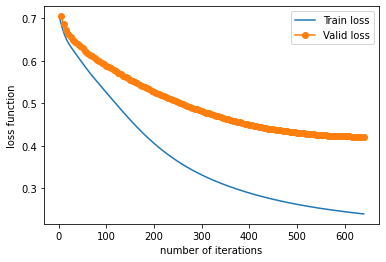

In [0]:
def MLP_train_valid(mlp, input_train, target_train, input_valid, target_valid, max_iter, valid_cycles, verbose):
   """
   Train and valid MLP every valid_cycles iterations
   """
   classes  = np.unique(target_train)
   loss_valid = []
   for i in range(max_iter//valid_cycles):
       for j in range(valid_cycles):
           out = mlp.partial_fit(input_train, target_train, classes)
           # Calculate loss function of valid set
       last_lost_valid = log_loss(target_valid, mlp.predict_proba(input_valid))
       loss_valid.append(last_lost_valid)
       if verbose:
           print("Iteration %d, train loss = %.8f, valid loss = %.8f" %
                 (mlp.n_iter_, mlp.loss_, last_lost_valid))
       if early_stopping and (i > 0) and (last_lost_valid > loss_valid[-2]): # Early stopping
           if verbose:
               print("Early stopping: Validation score did not improve")
           break
   if verbose: print(out)
   
   if verbose:
       # Visualizing the Cost Function Trajectory
       # (https://sdsawtelle.github.io/blog/output/week4-andrew-ng-machine-learning-with-python.html#Visualizing-the-Cost-Function-Trajectory)
       print("Visualizing the Cost Function Trajectory")
       plt.plot(range(1, len(mlp.loss_curve_)+1), mlp.loss_curve_, label='Train loss')
       plt.plot(range(valid_cycles,len(loss_valid)*valid_cycles+valid_cycles,valid_cycles), loss_valid, '-o', label='Valid loss')
       plt.xlabel('number of iterations')
       plt.ylabel('loss function')
       plt.legend(loc='upper right')
       plt.show()

n_hidden = 60
max_iter = 3000
learning_rate_init = 0.001
valid_cycles = 5
early_stopping = True
mlp = MLPClassifier(hidden_layer_sizes=(n_hidden,), learning_rate_init=learning_rate_init, shuffle=False, random_state=0, verbose=False)
MLP_train_valid(mlp, input_train, target_train, input_valid, target_valid, max_iter, valid_cycles, True)

Se ve que los errores descienden un poco y se estabilizan y el entrenamiento es detenido a las 640 iteraciones. Se muestran los resultados iniciales de este entrenamiento

In [0]:
predict_train = mlp.predict(input_train)
predict_valid = mlp.predict(input_valid)
print("Train accuracy: %.3f%%" % (accuracy_score(target_train, predict_train) * 100))
print("Valid accuracy: %.3f%%" % (accuracy_score(target_valid, predict_valid) * 100))
print("Train confusion matrix:")
print(confusion_matrix(target_train, predict_train))
print("Valid confusion matrix:")
print(confusion_matrix(target_valid, predict_valid))
print("Train classification report:")
print(classification_report(target_train, predict_train))
print("Valid classification report:")
print(classification_report(target_valid, predict_valid))

Train accuracy: 92.308%
Valid accuracy: 72.500%
Train confusion matrix:
[[54  3]
 [ 6 54]]
Valid confusion matrix:
[[16  5]
 [ 6 13]]
Train classification report:
              precision    recall  f1-score   support

       Feliz       0.90      0.95      0.92        57
     Infeliz       0.95      0.90      0.92        60

    accuracy                           0.92       117
   macro avg       0.92      0.92      0.92       117
weighted avg       0.92      0.92      0.92       117

Valid classification report:
              precision    recall  f1-score   support

       Feliz       0.73      0.76      0.74        21
     Infeliz       0.72      0.68      0.70        19

    accuracy                           0.73        40
   macro avg       0.72      0.72      0.72        40
weighted avg       0.72      0.72      0.72        40



En estos resultados iniciales se ve que MLP mejora respecto al Perceptrón en un 2,564% para el conjunto de entrenamiento. sin embargo, empeora un 10% para el conjunto de validación. Lo que indica que eliminando la limitación de separabilidad lineal se consiguen mejoras con el conjunto de entrenamiento, pero no en el conjunto de validación.

# Optimización ratio de aprendizaje

Para acelerar la convergencia de los MLP se busca un ratio de aprendizaje más adecuado, probando con distintos valores entre 0,001 y 0,1, utilizando la función de activación por defecto ReLU:

In [0]:
tests_learning_rate_init = [0.001, 0.005, 0.01, 0.05, 0.1]
activation = 'relu'
random_state = 0
now = datetime.now()
loss_curves =  []
for lr in tests_learning_rate_init:
   mlp = MLPClassifier(hidden_layer_sizes=(n_hidden,), learning_rate_init=lr, shuffle=False, random_state=random_state, verbose=False, activation=activation)
   MLP_train_valid(mlp, input_train, target_train, input_valid, target_valid, max_iter, valid_cycles, False)
   loss_curves.append(mlp.loss_curve_)

Se visualizan las gráficas de la evolución del error a lo largo de los ciclos para los distintos ratios de aprendizajes estudiados.

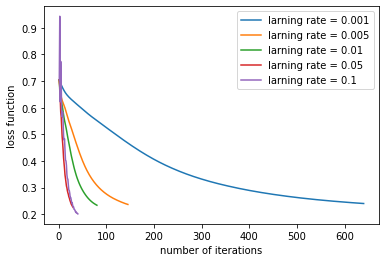

In [0]:
for (lr, loss_curve) in zip(tests_learning_rate_init, loss_curves):
   plt.plot(range(1, len(loss_curve)+1), loss_curve, label='larning rate = ' + str(lr))
plt.xlabel('number of iterations')
plt.ylabel('loss function')
plt.legend(loc='upper right')
plt.show()

Nos quedamos con el ratio de aprendizaje de 0.005.

# Optimización Arquitectura

Para tratar de mejorar los resultados de los MLP buscamos el número de neuronas ocultas más adecuado, probando con distintos valores entre 10 y 190, repitiendo parar cada configuración 10 veces y quedándose con aquella de mayor precisión en el conjunto de validación:

In [0]:
tests_n_hidden = [10, 30, 50, 70, 90, 110, 130, 150, 170, 190]
n_reps = 10
activation = 'relu'
learning_rate_init = 0.005
now = datetime.now()
best_mlp = []
best_acc = 0.0
accs_train = []
accs_valid = []
for n_hidden in tests_n_hidden:
   max_acc_train = max_acc_valid = 0.0
   for random_state in range(n_reps):
       mlp = MLPClassifier(hidden_layer_sizes=(n_hidden,), learning_rate_init=learning_rate_init, shuffle=False, random_state=random_state, verbose=False, activation=activation)
       MLP_train_valid(mlp, input_train, target_train, input_valid, target_valid, max_iter, valid_cycles, False)
       
       acc_train = accuracy_score(target_train, mlp.predict(input_train))
       acc_valid = accuracy_score(target_valid,mlp.predict(input_valid))
       print("Seed = %d, train acc = %.8f, valid acc = %.8f, iterations = %d" % (random_state, acc_train, acc_valid, len(mlp.loss_curve_)))
       if (max_acc_valid < acc_valid):
           max_acc_valid = acc_valid
           max_acc_train = acc_train
           if (acc_valid > best_acc):
               best_acc = acc_valid
               best_mlp = mlp
   accs_train.append(max_acc_train)
   accs_valid.append(max_acc_valid)
   print("Number hidden units = %i, train acc = %.8f, max valid acc = %.8f" % (n_hidden, max_acc_train, max_acc_valid))
print("Number of seconds for training: %d" % (datetime.now() - now).total_seconds())
print("Best MLP valid accuracy: %.8f%%" % (best_acc * 100))
print("Best MLP: ", best_mlp)

Seed = 0, train acc = 0.91452991, valid acc = 0.72500000, iterations = 260
Seed = 1, train acc = 0.90598291, valid acc = 0.77500000, iterations = 370
Seed = 2, train acc = 0.90598291, valid acc = 0.80000000, iterations = 640
Seed = 3, train acc = 0.91452991, valid acc = 0.75000000, iterations = 335
Seed = 4, train acc = 0.90598291, valid acc = 0.75000000, iterations = 390
Seed = 5, train acc = 0.90598291, valid acc = 0.77500000, iterations = 395
Seed = 6, train acc = 0.90598291, valid acc = 0.77500000, iterations = 290
Seed = 7, train acc = 0.90598291, valid acc = 0.75000000, iterations = 420
Seed = 8, train acc = 0.92307692, valid acc = 0.72500000, iterations = 340
Seed = 9, train acc = 0.91452991, valid acc = 0.72500000, iterations = 415
Number hidden units = 10, train acc = 0.90598291, max valid acc = 0.80000000
Seed = 0, train acc = 0.90598291, valid acc = 0.75000000, iterations = 215
Seed = 1, train acc = 0.90598291, valid acc = 0.77500000, iterations = 180
Seed = 2, train acc = 0

El mejor MLP encontrado ha sido empleando 10 neuronas en la capa oculta. 

Ahora mostraremos los resultados en unos gráficos de barras:

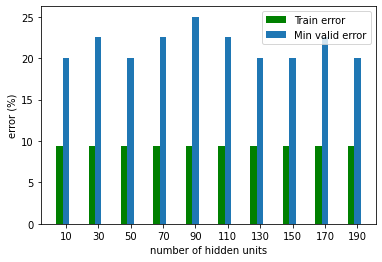

In [0]:
width = 4
plt.bar(np.array(tests_n_hidden) - width, 100 *(1- np.array(accs_train)), color='g', width=width, label='Train error')
plt.bar(np.array(tests_n_hidden), 100 *(1- np.array(accs_valid)), width=width, label='Min valid error')
plt.xlabel('number of hidden units')
plt.ylabel('error (%)')
plt.xticks(np.array(tests_n_hidden), tests_n_hidden)
plt.legend(loc='upper right')
plt.show()

Observamos que el error obtenido con 10 neuronas ocultas es menor, el resto aumentan u obtienen un error parecido.

# Resultados finales mejor MLP

Calculamos los resultados finales para el mejor MLP que hemos encontrado. 

In [0]:
predict_train = best_mlp.predict(input_train)
predict_valid = best_mlp.predict(input_valid)
print("Train accuracy: %.3f%%" % (accuracy_score(target_train, predict_train) * 100))
print("Valid accuracy: %.3f%%" % (accuracy_score(target_valid, predict_valid) * 100))
print("Train confusion matrix:")
print(confusion_matrix(target_train, predict_train))
print("Valid confusion matrix:")
print(confusion_matrix(target_valid, predict_valid))
print("Train classification report:")
print(classification_report(target_train, predict_train))
print("Valid classification report:")
print(classification_report(target_valid, predict_valid))

Train accuracy: 90.598%
Valid accuracy: 80.000%
Train confusion matrix:
[[54  3]
 [ 8 52]]
Valid confusion matrix:
[[16  5]
 [ 3 16]]
Train classification report:
              precision    recall  f1-score   support

       Feliz       0.87      0.95      0.91        57
     Infeliz       0.95      0.87      0.90        60

    accuracy                           0.91       117
   macro avg       0.91      0.91      0.91       117
weighted avg       0.91      0.91      0.91       117

Valid classification report:
              precision    recall  f1-score   support

       Feliz       0.84      0.76      0.80        21
     Infeliz       0.76      0.84      0.80        19

    accuracy                           0.80        40
   macro avg       0.80      0.80      0.80        40
weighted avg       0.80      0.80      0.80        40



Anteriormente el resultado obtenido fue de un 72% sobre el conjunto de validación, ha aumentado un 8% con respecto al mismo. Por tanto ha mejorado. 

# Conclusiones

El resultado obtenido parece ser aceptable, sin embargo puede producirse sobreentrenamiento y no disponemos de otros estudios de referencia para emplear como conjunto de test y ver su funcionamiento.